# 插值       
scipy.interpolate模块       
一维插值函数： interp1d    
二维插值函数： interp2d     
多维插值函数： interpnd\interpn   

# interp1d 一维插值函数            
interp1d(x,y,kind='linear')            
kind指明插值方法，有：'linear','nearest','zero','slinear','quadratic','cubic'等        
'zero','slinear','quadratic','cubic' 分别指0阶、1阶、2阶和3阶的样条插值         

### 一维插值


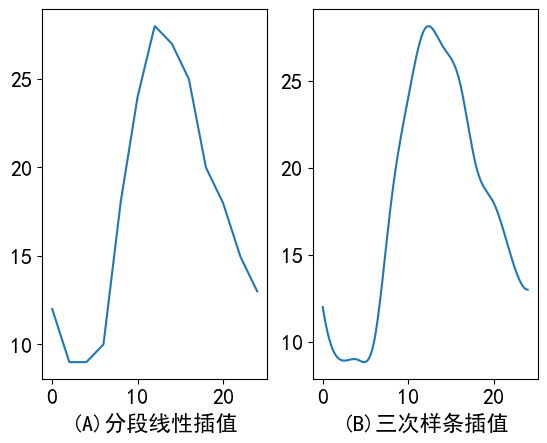

In [1]:
# 例题7.4
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

x = np.arange(0,25,2)
y = np.array([12,9,9,10,18,24,28,27,25,20,18,15,13])
x_new = np.linspace(0,24,500) # 生成了一个从0到24的等间隔的500个点，用作插值的新的自变量

f1 = interp1d(x,y)  # 对数据点使用线性插值
y1 = f1(x_new)

f2 = interp1d(x,y,'cubic')  # 对数据点使用三次样条插值
y2 = f2(x_new)

plt.rc('font',size=16); plt.rc('font',family='SimHei') # 这里使用“SimHei”以支持中文显示

plt.subplot(121)  #用于创建图形中的子图,三个数121 分别表示：图形将被分成的行数、图形将被分成的列数、当前激活的是这些子图中的第一个
plt.plot(x_new,y1)
plt.xlabel("(A)分段线性插值")

plt.subplot(122)
plt.plot(x_new,y2)
plt.xlabel("(B)三次样条插值")

plt.show()

### 二维网格节点插值

C:\Users\L.Ling\AppData\Local\Temp\ipykernel_2908\857219403.py:14: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f =interp2d(x,y,z,'cubic')
C:\Users\L.Ling\AppData\Local\Temp\ipykernel_2908\857219403.py:15: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D dat

区域内的面积为: 4782737.815311186


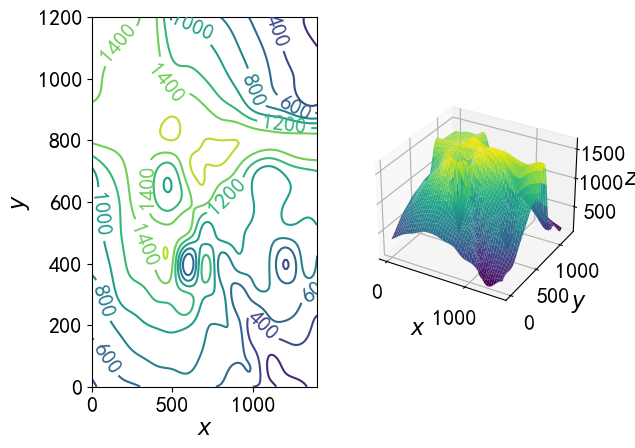

In [19]:
# 例题7.5
from mpl_toolkits import mplot3d # 用于生成3D图形
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm # 用于计算向量的范数
from scipy.interpolate import interp2d  # 用于进行二维插值
 
z = np.loadtxt('Pdata7_5.txt') # 加载高程数据
x = np.arange(0,1500,100)
y = np.arange(1200,-100,-100)
x_new = np.linspace(0,1400,141)
y_new = np.linspace(0,1200,121)
 
f =interp2d(x,y,z,'cubic') # 使用interp2d函数进行二维插值，其中'cubic'表示使用三次样条插值。
z_new = f(x_new,y_new) # 使用插值函数f计算新坐标点x_new和y_new处的高程值
m = len(x_new); n  = len(y_new); s = 0

# 计算每个小矩形单元分割成的两个三角形的面积，并累加得到整个区域的总面积：
for i in np.arange(m-1):
    for j in np.arange(n-1):
        #计算网格中的四个点，形成一个小矩形单元
        # 在代码中，interp2d函数首先接受x坐标，然后是y坐标，最后是z值，生成一个插值函数f。
        # 当使用f(x_new, y_new)调用这个函数时，实际上是先沿着y轴方向插值，然后是x轴方向，这意味着返回的z_new数组中，第一个索引对应y_new（纵向变化），第二个索引对应x_new（横向变化）。
        p1 = np.array([x_new[i],y_new[j],z_new[j,i]]) # 左下角的点  
        p2 = np.array([x_new[i+1],y_new[j],z_new[j,i+1]]) # 右下角的点
        p3 = np.array([x_new[i+1],y_new[j+1],z_new[j+1,i+1]]) #右上角的点
        p4 = np.array([x_new[i],y_new[j+1],z_new[j+1,i]]) # 左上角的点
        #将矩形分割成两个三角形，并计算这两个三角形的面积(海伦公式)
        p12 = norm(p1-p2); p23 = norm(p3-p2); p13 = norm(p3-p1); p14 = norm(p4-p1); p34 = norm(p4-p3)
        L1 = (p12+p23+p13)/2; s1 = np.sqrt(L1*(L1-p12)*(L1-p23)*(L1-p13))
        L2 = (p13+p14+p34)/2; s2 = np.sqrt(L2*(L2-p13)*(L2-p14)*(L2-p34))
        s = s+s1+s2 

print('区域内的面积为:',s)
plt.rc('font',size=16)

# 左图（等高线图）
plt.subplot(121) 
contr = plt.contour(x_new,y_new,z_new) #绘制等高线图
plt.clabel(contr) # 为等高线图上的等高线添加标签，显示高度值
plt.xlabel('$x$')
plt.ylabel('$y$',rotation=90)

#　右图（三维视图）
ax = plt.subplot(122,projection='3d') # 设置为3D视图，用于绘制3D表面图。
X,Y = np.meshgrid(x_new,y_new) # 生成一个2D网格，用于3D表面图的X和Y坐标
ax.plot_surface(X,Y,z_new,cmap='viridis') # 在3D坐标系中绘制表面图
ax.set_xlabel('$x$')
ax.set_ylabel('$y$') 
ax.set_zlabel('$z$')
plt.show()




### 二位散乱点插值

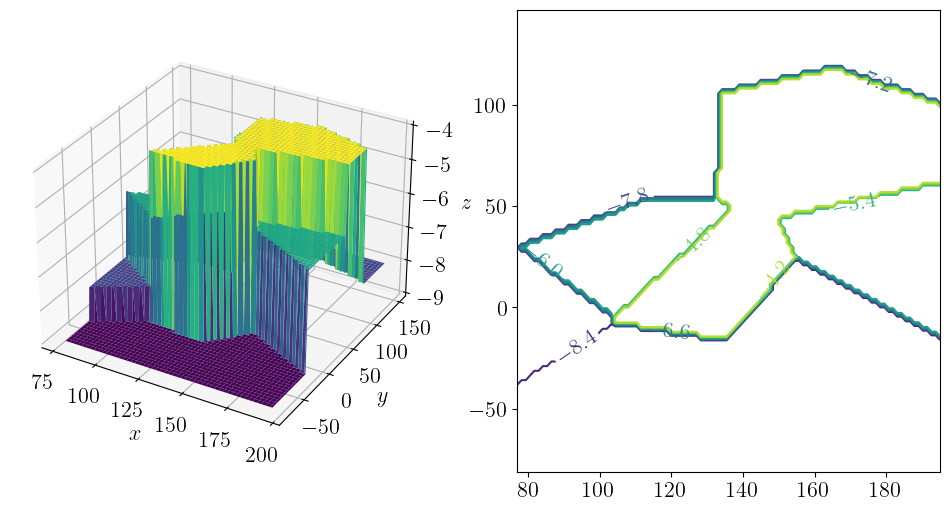

[[129.    7.5]
 [140.  141.5]
 [103.5  23. ]
 [ 88.  147. ]
 [185.5  22.5]
 [195.  137.5]
 [105.   85.5]
 [157.5  -6.5]
 [107.5 -81. ]
 [ 77.    3. ]
 [ 81.   56.5]
 [162.  -66.5]
 [162.   84. ]
 [117.5 -33.5]]


In [2]:
# 例7.6
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt 
import numpy as np
from scipy.interpolate import griddata

x = np.array([129,140,103.5,88,185.5,195,105,157.5,107.5,77,81,162,162,117.5])
y = np.array([7.5,141.5,23,147,22.5,137.5,85.5,-6.5,-81,3,56.5,-66.5,84,-33.5])
z = -np.array([4,8,6,8,6,8,8,9,9,8,8,9,4,9])

xy = np.vstack([x,y]).T
x_new = np.linspace(x.min(),x.max(),100)
y_new = np.linspace(y.min(),y.max(),100)
x_new_grid, y_new_grid = np.meshgrid(x_new,y_new) # 构造网格节点
z_new = griddata(xy,z,(x_new_grid,y_new_grid),method='nearest') # 最近邻点插值（与前面的方法有所不同）


plt.figure(figsize=(12, 6))  # 设置画布为12英寸宽和6英寸高
plt.rc('font',size=16); plt.rc('text',usetex=True)
ax = plt.subplot(121,projection='3d')
ax.plot_surface(x_new_grid,y_new_grid,z_new,cmap='viridis')
ax.set_xlabel('$x$'); ax.set_ylabel('$y$'); ax.set_zlabel('$z$')

plt.subplot(122)
c = plt.contour(x_new,y_new,z_new,8)
plt.clabel(c)
plt.savefig('figure7_6.png',dpi=500)
plt.show()

print(xy)


# 拟合

## 1.用numpy.polyfit 拟合

拟合二次多项式的从高次幂到低次幂的系数分别为： [-9.81083916 20.12929371 -0.03167133]
预测值分别为： [4.38747465 5.81175367]


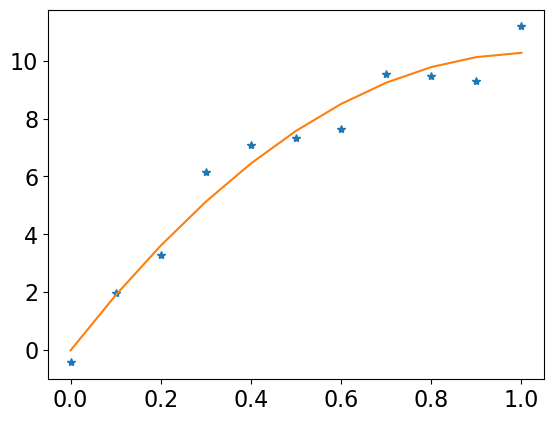

In [5]:
# 例题7.7  用polyfit函数拟合二次多项式 用polyval计算多项式的值
from numpy import polyfit, polyval, array, arange  # polyfit 用于多项式拟合 polyval 用于计算多项式的值
import matplotlib.pyplot as plt

x0 = arange(0,1.1,0.1)
y0 = array([-0.447,1.978,3.28,6.16,7.08,7.34,7.66,9.56,9.48,9.30,11.2])
p = polyfit(x0,y0,2) # 拟合二次多项式
print("拟合二次多项式的从高次幂到低次幂的系数分别为：",p)

yhat = polyval(p,[0.25,0.35])
print("预测值分别为：", yhat)

plt.rc('font',size=16)
plt.plot(x0,y0,'*',x0,polyval(p,x0),'-')
plt.show()

## 2.用curve_fit 拟合

In [3]:
# 例题7.8 用curve_fit 函数拟合二次多项式，并求预测值
import numpy as np
from scipy.optimize import curve_fit

y = lambda x, a, b, c: a*x**2+b*x+c
x0 = np.arange(0,1.1,0.1)
y0 = np.array([-0.447,1.978,3.28,6.16,7.08,7.34,7.66,9.56,9.48,9.30,11.2]) 
popt, pcov =  curve_fit(y,x0,y0)  # y 是定义的模型函数，x0 和 y0 是数据点。 curve_fit 返回最优参数值 popt 和参数的协方差矩阵 pcov。
print("拟合的参数值:",popt)
print("当x为0.25和0.35时的预测值值分别为：",y(np.array([0.25,0.35]),*popt)) # 这里使用了 *popt 来将 popt 数组中的元素展开为函数 y 的参数。

拟合的参数值: [-9.81083901 20.12929291 -0.03167108]
预测值分别为： [4.38747471 5.81175366]


In [4]:
# 例题7.9 
import numpy as np
from scipy.optimize import curve_fit 

x0 = np.array([6,2,6,7,4,2,5,9])
y0 = np.array([4,9,5,3,8,5,8,2])
z0 = np.array([5,2,1,9,7,4,3,3])
xy0 = np.vstack((x0,y0))

def pfun(t,a,b,c):
    return a*np.exp(b*t[0]) + c*t[1]**2  

popt, pcov = curve_fit(pfun,xy0,z0) # pfun 是定义的模型函数，xy0 和 z0 是数据点。
print("a,b,c的拟合值为:",popt)


a,b,c的拟合值为: [ 5.08907305e+00 -2.58248004e-03 -2.14509683e-02]


三个参数的拟合值分别为： [0.98833453 2.01379578 3.0045425 ]


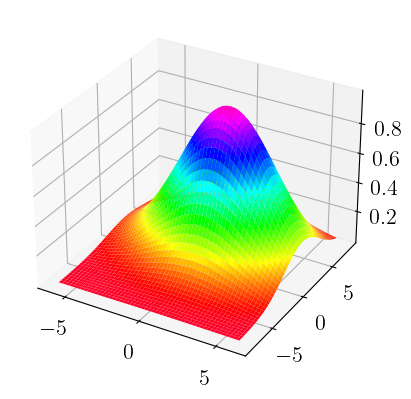

In [33]:
# 例7.10
from mpl_toolkits import mplot3d
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

m = 200; n = 300
x = np.linspace(-6,6,m)
y = np.linspace(-8,8,n)
x2, y2 = np.meshgrid(x,y) # 这里的 x 和 y 是一维数组，分别包含了两个维度上的坐标点。meshgrid 函数会将这两个一维数组转换成两个二维数组
x3 = np.reshape(x2,(1,-1))
y3 = np.reshape(y2,(1,-1))
xy = np.vstack((x3,y3))

def pfun(t, m1, m2, s):
    return np.exp(-((t[0]-m1)**2+(t[1]-m2)**2) / (2*s**2))
"""
(1-2为模拟记录到的有噪声的值)
1.计算 z：使用定义的函数 pfun 和预设的参数 (这里为 1, 2, 3) 计算 z 值，这些值没有噪声，代表理想（无误差）的模型输出。
2.添加噪声得到 zr：在理想的 z 值上添加噪声，得到 zr。这步模拟实际观测过程中的数据，其中噪声可能由测量误差或其他随机因素引入。

（3-5为依据有噪声的值拟合出参数，并依据参数计算拟合的结果）
3.拟合新参数：使用带噪声的数据 zr 和 curve_fit 函数拟合模型，从而得到新的参数。这一步骤模仿了根据实际数据估计模型参数的过程。
4.使用拟合参数计算 zn：根据拟合得到的新参数（popt），使用模型函数 pfun 计算新的 zn 值，这代表了使用拟合参数预测的模型输出。
5.重塑为原始网格形状的 zn2：最后，将计算得到的 zn 重塑（reshape）为与原始网格 x2, y2 形状相同的二维数组 zn2，以便于在三维空间中进行可视化。
"""
z = pfun(xy,1,2,3) #使用给定的参数调用pfun函数，计算出没有噪声的z值。 
z_random = z+0.2*np.random.normal(size=z.shape) # 在z值上添加随机噪声，生成模拟实验数据zr。
popt, pcov = curve_fit(pfun,xy,z_random) # 拟合参数
print('三个参数的拟合值分别为：',popt)

znew = pfun(xy,*popt) # 使用拟合得到的参数，通过模型函数计算拟合后的z值。
znew2 = np.reshape(znew,x2.shape) # 将拟合后的z值重塑成原始网格的形状

plt.rc('font',size=16)
ax = plt.axes(projection='3d') # 创建一个三维坐标轴对象
ax.plot_surface(x2,y2,znew2,cmap='gist_rainbow')
plt.show()


In [ ]:
# 无注释版
from mpl_toolkits import mplot3d 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

m = 200;n = 300
x = np.linspace(-6,6,m);y = np.linspace(-8,8,n)
x2,y2 = np.meshgrid(x, y)
x3 = np.reshape(x2,(1,-1));y3 = np.reshape(y2,(1,-1))
xy = np.vstack((x3,y3))


pfun = lambda t, a,b,c: np.exp(-((t[0]-a)**2+(t[1]-b)**2) / (2*c**2))

z = pfun(xy,1,2,3)
z_random = z + 0.2*np.random.normal(size=z.shape)

popt,pcov = curve_fit(pfun,xy,z_random)
z_new = pfun(xy,*popt)
z_new2 = np.reshape(z_new,x2.shape)

plt.rc('font',size=16)
ax = plt.axes(projection='3d')
ax.plot_surface(x2,y2,z_new2,cmap='gist_rainbow')
plt.show()